Trabalho Imersão - 06 e 07 fevereiro - Patricia Sebastião, Julierme, Stefania, Mariene - Turma B

In [155]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [156]:
base = pd.read_csv('/content/drive/MyDrive/Cópia de RD202403.csv',
                   sep = ';',
                   low_memory=False)

In [157]:
base.shape

(1183297, 113)

In [158]:
pd.options.display.max_info_columns = 113
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183297 entries, 0 to 1183296
Data columns (total 113 columns):
 #    Column      Non-Null Count    Dtype  
---   ------      --------------    -----  
 0    UF_ZI       1183297 non-null  int64  
 1    ANO_CMPT    1183297 non-null  int64  
 2    MES_CMPT    1183297 non-null  int64  
 3    ESPEC       1183297 non-null  int64  
 4    CGC_HOSP    880267 non-null   float64
 5    N_AIH       1183297 non-null  int64  
 6    IDENT       1183297 non-null  int64  
 7    CEP         1183297 non-null  int64  
 8    MUNIC_RES   1183297 non-null  int64  
 9    NASC        1183297 non-null  int64  
 10   SEXO        1183297 non-null  int64  
 11   UTI_MES_IN  1183297 non-null  int64  
 12   UTI_MES_AN  1183297 non-null  int64  
 13   UTI_MES_AL  1183297 non-null  int64  
 14   UTI_MES_TO  1183297 non-null  int64  
 15   MARCA_UTI   1183297 non-null  int64  
 16   UTI_INT_IN  1183297 non-null  int64  
 17   UTI_INT_AN  1183297 non-null  int64  
 18   

Prever o custo das internações

In [180]:
dengue = base[
              (base['DIAG_PRINC']=='A90 ')|
              (base['DIAG_PRINC']=='A91 ')
              ]

dengue = dengue[
              (dengue['UF_ZI']== 530000) &
              (dengue['COD_IDADE']== 4) &
              (dengue['IDADE']>= 1)
              ]

dengue = dengue[['ESPEC',
                     'SEXO',
                     'MARCA_UTI',
                     'DIAR_ACOM',
                     'QT_DIARIAS',
                     'VAL_SH',
                     'VAL_SP',
                     'VAL_TOT',
                     'VAL_UTI',
                     'DIAS_PERM',
                     'MORTE',
                     'NUM_FILHOS',
                     'GESTRISCO',
                     ##'INFEHOSP',
                     'COMPLEX',
                     'DIAG_PRINC'
                     ]]

dengue.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, 168218 to 190081
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESPEC       2209 non-null   int64  
 1   SEXO        2209 non-null   int64  
 2   MARCA_UTI   2209 non-null   int64  
 3   DIAR_ACOM   2209 non-null   int64  
 4   QT_DIARIAS  2209 non-null   int64  
 5   VAL_SH      2209 non-null   float64
 6   VAL_SP      2209 non-null   float64
 7   VAL_TOT     2209 non-null   float64
 8   VAL_UTI     2209 non-null   float64
 9   DIAS_PERM   2209 non-null   int64  
 10  MORTE       2209 non-null   int64  
 11  NUM_FILHOS  2209 non-null   int64  
 12  GESTRISCO   2209 non-null   int64  
 13  COMPLEX     2209 non-null   int64  
 14  DIAG_PRINC  2209 non-null   object 
dtypes: float64(4), int64(10), object(1)
memory usage: 276.1+ KB


In [182]:
dengue.isnull().sum()

,0
ESPEC,0
SEXO,0
MARCA_UTI,0
DIAR_ACOM,0
QT_DIARIAS,0
VAL_SH,0
VAL_SP,0
VAL_TOT,0
VAL_UTI,0
DIAS_PERM,0


In [183]:
dengue['DIAG_PRINC'].value_counts()

,count
DIAG_PRINC,
A90,2091
A91,118


In [184]:
dengue.to_csv('dengue.csv', sep =";", decimal =',', index= False)

In [185]:
del base

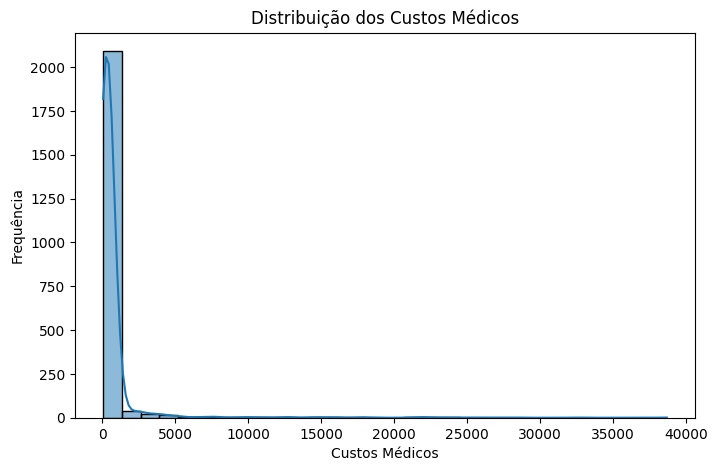

In [186]:
plt.figure(figsize=(8, 5))
sns.histplot(dengue['VAL_TOT'], bins=30, kde=True)
plt.title("Distribuição dos Custos Médicos")
plt.xlabel("Custos Médicos")
plt.ylabel("Frequência")
plt.show()

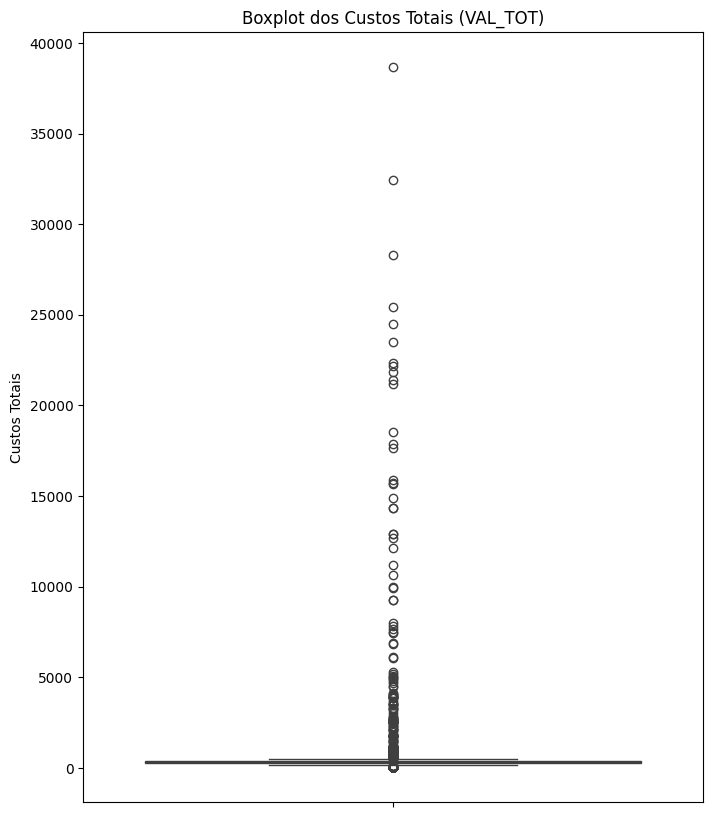

In [187]:
##plt.figure(figsize=(8, 5))
##sns.boxplot(dengue['VAL_TOT'])
##plt.title("Distribuição dos Custos Médicos")
##plt.xlabel("Custos Médicos")
##plt.ylabel("Frequência")
##plt.show()

plt.figure(figsize=(8, 10))
sns.boxplot(y='VAL_TOT', data=dengue)
plt.title('Boxplot dos Custos Totais (VAL_TOT)')
plt.ylabel('Custos Totais')
plt.show()

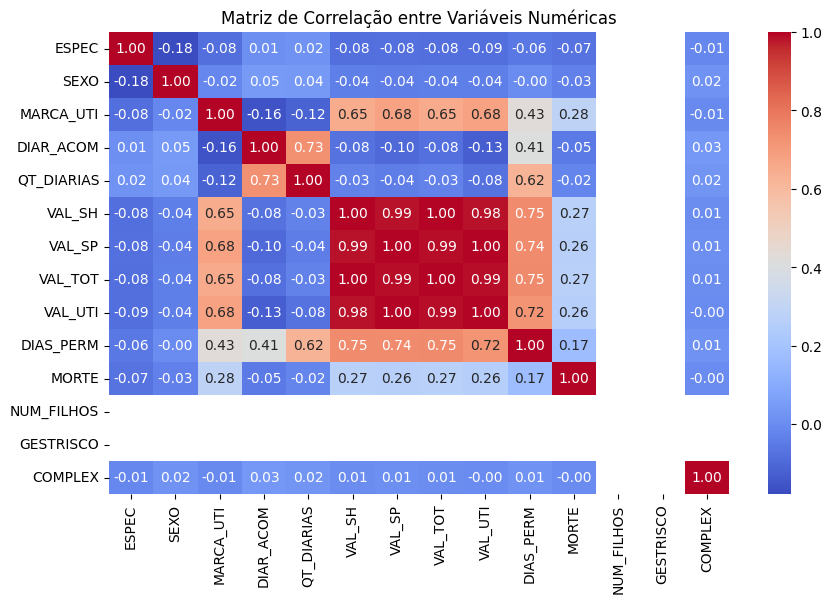

In [193]:
plt.figure(figsize=(10, 6))
sns.heatmap(dengue.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

In [194]:
y = pd.DataFrame(dengue['VAL_TOT'])
x = pd.DataFrame(dengue['DIAS_PERM'])
x_const = sm.add_constant(x)
modelo = sm.OLS(y,x_const).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                VAL_TOT   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     2789.
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:30:09   Log-Likelihood:                -19325.
No. Observations:                2209   AIC:                         3.865e+04
Df Residuals:                    2207   BIC:                         3.866e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -721.1030     41.866    -17.224      0.0

In [197]:
y = dengue['VAL_TOT']
x = dengue[['ESPEC',
           'SEXO',
           'MARCA_UTI',
           'DIAR_ACOM',
           'QT_DIARIAS',
           'DIAS_PERM',
           'MORTE',
           'NUM_FILHOS',
           'GESTRISCO',
           'COMPLEX',
           'DIAG_PRINC'
              ]]
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, 168218 to 190081
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ESPEC       2209 non-null   int64 
 1   SEXO        2209 non-null   int64 
 2   MARCA_UTI   2209 non-null   int64 
 3   DIAR_ACOM   2209 non-null   int64 
 4   QT_DIARIAS  2209 non-null   int64 
 5   DIAS_PERM   2209 non-null   int64 
 6   MORTE       2209 non-null   int64 
 7   NUM_FILHOS  2209 non-null   int64 
 8   GESTRISCO   2209 non-null   int64 
 9   COMPLEX     2209 non-null   int64 
 10  DIAG_PRINC  2209 non-null   object
dtypes: int64(10), object(1)
memory usage: 207.1+ KB


In [198]:
y.info()

<class 'pandas.core.series.Series'>
Index: 2209 entries, 168218 to 190081
Series name: VAL_TOT
Non-Null Count  Dtype  
--------------  -----  
2209 non-null   float64
dtypes: float64(1)
memory usage: 34.5 KB


# Nova seção